In [2]:
import tf_keras as tfk
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder


2024-08-22 10:24:33.077478: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-22 10:24:33.077638: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-22 10:24:33.322448: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
df = pd.read_csv("/kaggle/input/test-8-0/loan_prediction.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


As we see not all columns are in int format and this would cause issues when training a model. This it is important to perform one-hot-encoding over this data
the columns which need to encoded are 
1. Gender
2. Education
3. Employment
4. Property Area

In [6]:
status = df[['Loan_Status']]
loan_df = df.drop('Loan_Status', axis = 1)

In [7]:
encoder = OneHotEncoder(sparse=False)
encoded_data = encoder.fit_transform(loan_df[['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']))
encoded_df.head()

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Gender_Female,Gender_Male,Gender_nan,Married_No,Married_Yes,Married_nan,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Self_Employed_nan,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


Now the encoded data here is set up with all the encodings converted into an column. this way when we treat the feature which once was categorical, we check independently for all the categorical colums and can generate concepts of comparisions and analysis using them individually. 

In [8]:
encoded_df.describe()

,Gender_Female,Gender_Male,Gender_nan,Married_No,Married_Yes,Married_nan,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Self_Employed_nan,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.182410,0.796417,0.021173,0.346906,0.648208,0.004886,0.781759,0.218241,0.814332,0.133550,0.052117,0.291531,0.379479,0.328990
std,0.386497,0.402991,0.144077,0.476373,0.477919,0.069786,0.413389,0.413389,0.389155,0.340446,0.222445,0.454838,0.485653,0.470229
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


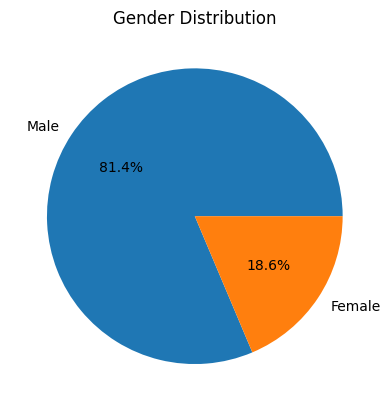

In [9]:
gender_counts = df['Gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.show()

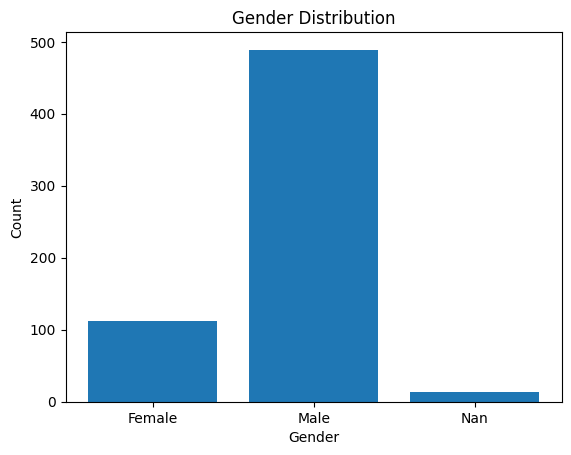

In [10]:
gen_f = encoded_df['Gender_Female'].sum()
gen_m = encoded_df['Gender_Male'].sum()
gen_n = encoded_df['Gender_nan'].sum()
gen = [gen_f, gen_m, gen_n]

plt.bar(['Female', 'Male', 'Nan'], gen)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()

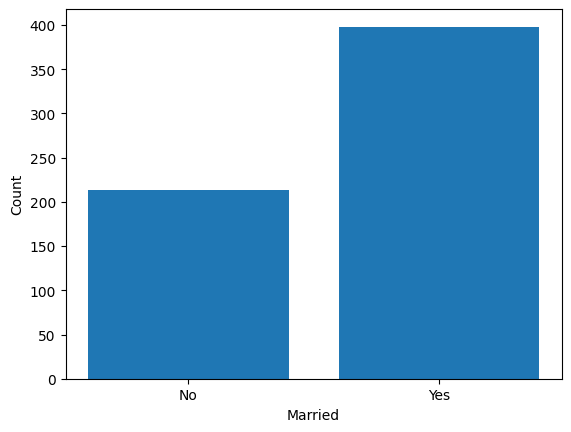

In [11]:
mar_N = encoded_df['Married_No'].sum()
mar_Y = encoded_df['Married_Yes'].sum()
mar = [mar_N, mar_Y]

plt.bar(['No', 'Yes'], mar)
plt.xlabel('Married')
plt.ylabel('Count')
plt.show()

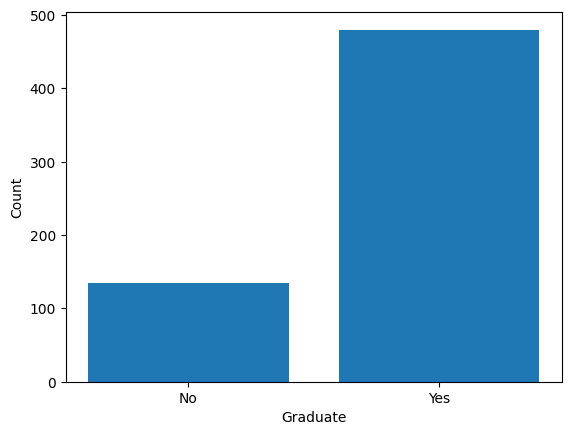

In [12]:
gen_f = encoded_df['Education_Not Graduate'].sum()
gen_m = encoded_df['Education_Graduate'].sum()
gen = [gen_f, gen_m]

plt.bar(['No', 'Yes'], gen)
plt.xlabel('Graduate')
plt.ylabel('Count')
plt.show()

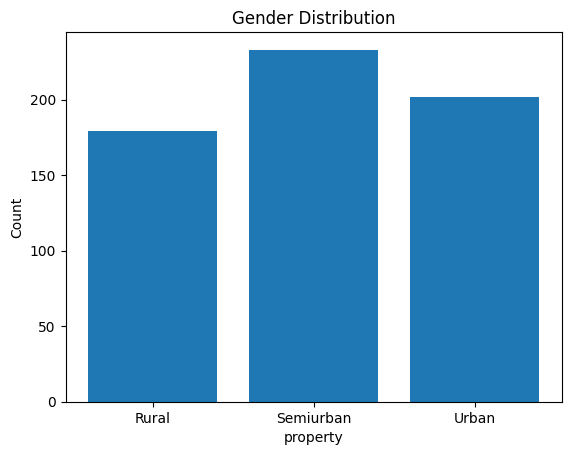

In [13]:
gen_f = encoded_df['Property_Area_Rural'].sum()
gen_m = encoded_df['Property_Area_Semiurban'].sum()
gen_n = encoded_df['Property_Area_Urban'].sum()
gen = [gen_f, gen_m, gen_n]

plt.bar(['Rural', 'Semiurban', 'Urban'], gen)
plt.xlabel('property')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()

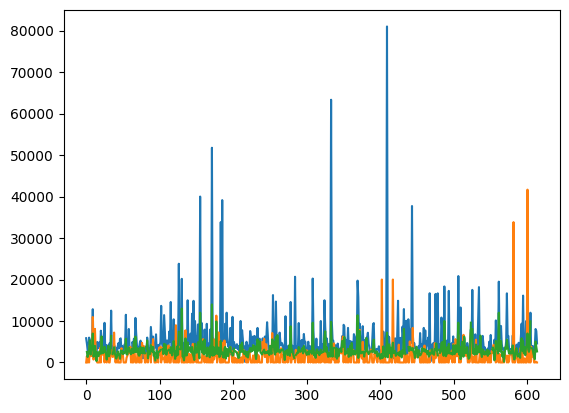

In [14]:
plt.plot(df[['ApplicantIncome']])
plt.plot(df['CoapplicantIncome'])
plt.plot(df[['LoanAmount']]* 20)

In [15]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [16]:
encoded_df.head()

,Gender_Female,Gender_Male,Gender_nan,Married_No,Married_Yes,Married_nan,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Self_Employed_nan,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [17]:
columns_encoded = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']
loan_Df = loan_df.drop(columns_encoded, axis = 1)

In [18]:
loan_Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Dependents         599 non-null    object 
 2   ApplicantIncome    614 non-null    int64  
 3   CoapplicantIncome  614 non-null    float64
 4   LoanAmount         592 non-null    float64
 5   Loan_Amount_Term   600 non-null    float64
 6   Credit_History     564 non-null    float64
dtypes: float64(4), int64(1), object(2)
memory usage: 33.7+ KB


In [19]:
loan_Df.fillna(loan_Df.select_dtypes(include=['int64', 'float64']).mean(), inplace=True)
loan_Df.fillna(0, inplace = True)
loan_Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Dependents         614 non-null    object 
 2   ApplicantIncome    614 non-null    int64  
 3   CoapplicantIncome  614 non-null    float64
 4   LoanAmount         614 non-null    float64
 5   Loan_Amount_Term   614 non-null    float64
 6   Credit_History     614 non-null    float64
dtypes: float64(4), int64(1), object(2)
memory usage: 33.7+ KB


In [20]:
loan_Df.drop(['Loan_ID'], axis = 1, inplace = True)

In [21]:

df.drop(['Loan_ID'], axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [22]:

categorical_columns = df.select_dtypes(include=['object']).columns


Loan__df = pd.get_dummies(df, columns=categorical_columns)

Loan__df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ApplicantIncome          614 non-null    int64  
 1   CoapplicantIncome        614 non-null    float64
 2   LoanAmount               592 non-null    float64
 3   Loan_Amount_Term         600 non-null    float64
 4   Credit_History           564 non-null    float64
 5   Gender_Female            614 non-null    bool   
 6   Gender_Male              614 non-null    bool   
 7   Married_No               614 non-null    bool   
 8   Married_Yes              614 non-null    bool   
 9   Dependents_0             614 non-null    bool   
 10  Dependents_1             614 non-null    bool   
 11  Dependents_2             614 non-null    bool   
 12  Dependents_3+            614 non-null    bool   
 13  Education_Graduate       614 non-null    bool   
 14  Education_Not Graduate   6

In [23]:
Loan__df['Credit_History'].fillna(0, inplace = True)
Loan__df.fillna(Loan__df.mean(), inplace = True)
Loan__df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ApplicantIncome          614 non-null    int64  
 1   CoapplicantIncome        614 non-null    float64
 2   LoanAmount               614 non-null    float64
 3   Loan_Amount_Term         614 non-null    float64
 4   Credit_History           614 non-null    float64
 5   Gender_Female            614 non-null    bool   
 6   Gender_Male              614 non-null    bool   
 7   Married_No               614 non-null    bool   
 8   Married_Yes              614 non-null    bool   
 9   Dependents_0             614 non-null    bool   
 10  Dependents_1             614 non-null    bool   
 11  Dependents_2             614 non-null    bool   
 12  Dependents_3+            614 non-null    bool   
 13  Education_Graduate       614 non-null    bool   
 14  Education_Not Graduate   6

/tmp/ipykernel_33/1875531234.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Loan__df['Credit_History'].fillna(0, inplace = True)


In [24]:
status


,Loan_Status
0,Y
1,N
2,Y
3,Y
4,Y
...,...
609,Y
610,Y
611,Y
612,Y


In [25]:

status['Loan_Status'] = status['Loan_Status'].map({'Y': 1, 'N': 0})

print(status)

     Loan_Status
0              1
1              0
2              1
3              1
4              1
..           ...
609            1
610            1
611            1
612            1
613            0

[614 rows x 1 columns]


/tmp/ipykernel_33/1865193098.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  status['Loan_Status'] = status['Loan_Status'].map({'Y': 1, 'N': 0})


In [26]:
X_train, X_test, y_train, y_test = train_test_split(Loan__df, status, test_size = 0.2, random_state = 42)

In [27]:
from sklearn.linear_model import LogisticRegression
reg_model = LogisticRegression()
reg_model.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
reg_preds = reg_model.predict(X_test)
reg_preds

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1])

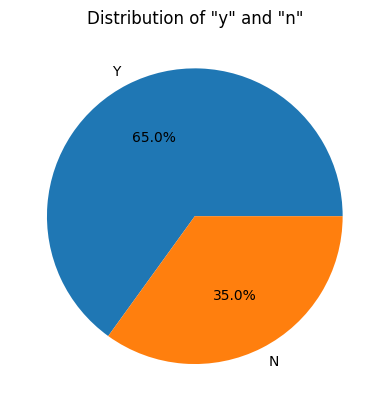

In [29]:
labels = ['Y', 'N']
counts = [reg_preds.sum(), len(reg_preds) - reg_preds.sum()]

plt.pie(counts, labels=labels, autopct='%1.1f%%')
plt.title('Distribution of "y" and "n"')
plt.show()

In [33]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

In [31]:
svr_model = SVR() 
svr_model.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [69]:
import numpy as np
svr_preds = svr_model.predict(X_test)
svr_preds = np.where(svr_preds > 0.9, 1, 0)

([<matplotlib.patches.Wedge at 0x7a3686708b50>,
 [Text(0.014047376791664278, 1.0999103014361096, 'Y'),
  Text(-0.014047376791664167, -1.0999103014361096, 'N')],
 [Text(0.0076622055227259685, 0.5999510735106052, '49.6'),
  Text(-0.007662205522725909, -0.5999510735106052, '50.4')])

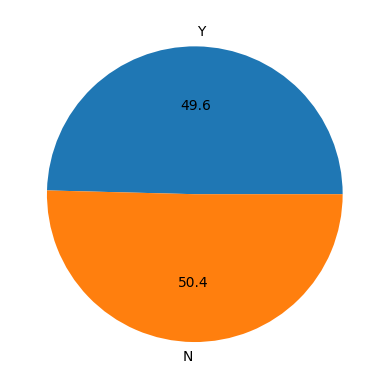

In [70]:
values_svr = [svr_preds.sum(), len(svr_preds) - svr_preds.sum()]
plt.pie(values_svr, labels = labels, autopct = '%.1f')

In [34]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=32, random_state=42)
rf_model.fit(X_train, y_train)

/tmp/ipykernel_33/3774894964.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)


RandomForestRegressor(n_estimators=32, random_state=42)

In [42]:
rf_preds = rf_model.predict(X_test)
rf_preds = rf_preds.astype(int)
rf_preds

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1])

([<matplotlib.patches.Wedge at 0x7a368790bf70>,
 [Text(-0.500640733240328, 0.979468660152323, 'Y'),
  Text(0.500640641535851, -0.9794687070256873, 'N')],
 [Text(-0.2730767635856334, 0.5342556328103579, '65.0%'),
  Text(0.27307671356500957, -0.5342556583776475, '35.0%')])

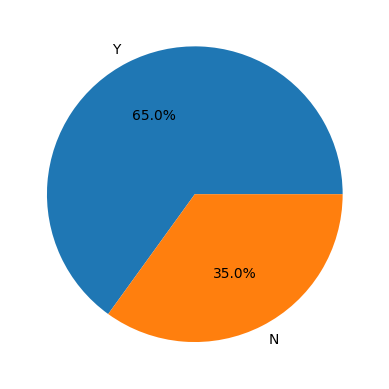

In [46]:
values = [int(rf_preds.sum()), len(rf_preds) - int(rf_preds.sum())]
plt.pie(values, labels = labels, autopct='%1.1f%%')